# Plotting edge variables

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib widget

In [3]:
import psyplot.project as psy

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
from IPython.display import display, Video
import cfgrib

import math

import warnings
warnings.filterwarnings("ignore", r"\s*The on_mappable_changed")
warnings.filterwarnings("ignore", r"\s*The input coordinates")
warnings.filterwarnings("ignore", r"\s*shading=")
warnings.filterwarnings("ignore", r"\s*\[Warning by")
warnings.filterwarnings("ignore", r"\s*ShapelyDeprecationWarning")

# To work with self-written modules, the paths of the modules directories have to be added
from pathlib import Path
import sys
icon_vis_dir = Path.cwd().parent
sys.path.insert(1,str(Path(icon_vis_dir,'data')))
sys.path.insert(1,str(Path(icon_vis_dir,'modules')))
sys.path.insert(1,str(Path(icon_vis_dir,'grid')))
sys.path.insert(1,str(icon_vis_dir / "modules" / "formatoptions"))

In [4]:
from grid import *

# custom formatoptions import
import lakes
import borders
import rivers
import meanmaxwind
import standardtitle

In [5]:
f_vt_vn = 'data/grib/vnvt00010000'
f_vt_vn2= '/scratch/vcherkas/icon-vis/data/example_data/grib/vnvt00010000' # ONLY VN, VT variables
f_vt_vn3 = '/scratch/cosuna/visualization/newdata/lfff00010000' # VN, VT AND cell center variables (P, T, U, V etc)
f_grid  = '/scratch/vcherkas/icon-vis/data/example_data/grids/icon_grid_0001_R19B08_mch.nc' # GRID file

#f_vt_vn = 'data/grib/mch_bench_r19b07_dev_atm_3d_ml_20210620T120000Z.grb'

#f_vt_vn = 'data/grib/lfff00000000z_vn'

In [6]:
# If your GRIB data has only edge variables, eg f_vt_vn2 has only VN, VT, 
# then you can create the xarray dataset as normal with:
# psy.open_dataset() as in this cell.
# However if your ICON GRIB data has a combination of cell center and edge variables, 
# then you can use cfgrib.open_dataset(). See following cell. 

ds_edge =  psy.open_dataset(f_vt_vn2, engine='cfgrib', backend_kwargs={'indexpath': '', 'errors': 'ignore'})
ds_edge

<xarray.Dataset>
Dimensions:               (generalVerticalLayer: 80, values: 1567452)
Coordinates:
    number                int64 ...
    time                  datetime64[ns] ...
    step                  timedelta64[ns] ...
  * generalVerticalLayer  (generalVerticalLayer) float64 1.0 2.0 ... 79.0 80.0
    valid_time            datetime64[ns] ...
Dimensions without coordinates: values
Data variables:
    VN                    (generalVerticalLayer, values) float32 ...
    VT                    (generalVerticalLayer, values) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             lssw
    GRIB_centreDescription:  Zurich
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Zurich
    history:                 2022-04-05T13:32 GRIB to CDM+CF via cfgrib-0.9.9...

In [7]:
# If your ICON GRIB data has a combination of cell center and edge variables, 
# then you can use cfgrib.open_dataset(). 

dss = cfgrib.open_datasets(f_vt_vn3, engine='cfgrib',
                        backend_kwargs={
                            'indexpath': '', 'errors': 'ignore',
                            "read_keys": ["typeOfLevel", "gridType"],
                            "filter_by_keys": {"typeOfLevel": "generalVerticalLayer"},
                        }, encode_cf=("time", "geography", "vertical"))
ds_cell = dss[0]
ds_edge = dss[1]

In [8]:
ds_edge

<xarray.Dataset>
Dimensions:               (generalVerticalLayer: 80, values: 1567452)
Coordinates:
    number                int64 1
    time                  datetime64[ns] 2022-02-16
    step                  timedelta64[ns] 01:00:00
  * generalVerticalLayer  (generalVerticalLayer) float64 1.0 2.0 ... 79.0 80.0
    valid_time            datetime64[ns] 2022-02-16T01:00:00
Dimensions without coordinates: values
Data variables:
    VN                    (generalVerticalLayer, values) float32 ...
    VT                    (generalVerticalLayer, values) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             lssw
    GRIB_centreDescription:  Zurich
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Zurich

In [9]:
ds_grid = psy.open_dataset(f_grid)
ds_grid

<xarray.Dataset>
Dimensions:                        (cell: 1043968, vertex: 523485, edge: 1567452, nv: 3, nc: 2, ne: 6, no: 4, max_chdom: 1, cell_grf: 14, edge_grf: 24, vert_grf: 13)
Coordinates:
    clon                           (cell) float64 ...
    clat                           (cell) float64 ...
    vlon                           (vertex) float64 ...
    vlat                           (vertex) float64 ...
    elon                           (edge) float64 ...
    elat                           (edge) float64 ...
    clon_vertices                  (cell, nv) float64 ...
    clat_vertices                  (cell, nv) float64 ...
    elon_vertices                  (edge, no) float64 ...
    elat_vertices                  (edge, no) float64 ...
    vlon_vertices                  (vertex, ne) float64 ...
    vlat_vertices                  (vertex, ne) float64 ...
Dimensions without coordinates: cell, vertex, edge, nv, nc, ne, no, max_chdom, cell_grf, edge_grf, vert_grf
Data variables: (12/45)
    cartesian_x_vertices           (vertex) float64 ...
    cartesian_y_vertices           (vertex) float64 ...
    cartesian_z_vertices           (vertex) float64 ...
    cell_area                      (cell) float64 ...
    dual_area                      (vertex) float64 ...
    lon_cell_centre                (cell) float64 ...
    ...                             ...
    end_idx_e                      (max_chdom, edge_grf) int32 ...
    refin_v_ctrl                   (vertex) int32 ...
    start_idx_v                    (max_chdom, vert_grf) int32 ...
    end_idx_v                      (max_chdom, vert_grf) int32 ...
    parent_edge_index              (edge) int32 ...
    parent_vertex_index            (vertex) int32 ...
Attributes: (12/18)
    title:                ICON grid description
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    source:               svn://rclh.dwd.de/for0adm/SVN_icontools/tags/iconto...
    number_of_grid_used:  1
    ICON_grid_file_uri:   
    centre:               215
    ...                   ...
    inverse_flattening:   0.0
    grid_level:           8
    grid_root:            19
    uuidOfParHGrid:       e6ddd597-9c90-27b1-fbac-c40d47f72ba0
    uuidOfHGrid:          5a0a863d-2523-9515-7789-4930e3452bc0
    global_grid:          0

In [16]:
ds = combine_grid_information(ds_edge, f_grid)
ds_cellvars = combine_grid_information(ds_cell, f_grid)

# You can see the combine_grid_information added the elon, elat, and elon_bndd, elat_bnds 
# from the grid to the coordinates.
# Also other coordinate data has been added, which is useful for plotting edge vectors (eg VN, VT) specifically. 
ds

<xarray.Dataset>
Dimensions:                        (generalVerticalLayer: 80, time: 1, edge: 1567452, no: 4, cart: 2)
Coordinates: (12/15)
    number                         int64 1
    forecast_reference_time        datetime64[ns] 2022-02-16
    step                           timedelta64[ns] 01:00:00
  * generalVerticalLayer           (generalVerticalLayer) float64 1.0 ... 80.0
  * time                           (time) datetime64[ns] 2022-02-16T01:00:00
    elon                           (edge) float64 0.2893 0.2896 ... 0.2421
    ...                             ...
    zonal_normal_primal_edge       (edge) float64 -0.7445 -0.7444 ... 0.955
    meridional_normal_primal_edge  (edge) float64 0.6676 0.6677 ... 0.2966
    edge_system_orientation        (edge) int32 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    zn                             (edge) float64 -0.7445 -0.7444 ... 0.955
    mn                             (edge) float64 0.6676 0.6677 ... 0.2966
    normal_edge                    (cart, edge) float64 -0.7445 ... 0.2966
Dimensions without coordinates: edge, no, cart
Data variables:
    VN                             (time, generalVerticalLayer, edge) float32 ...
    VT                             (time, generalVerticalLayer, edge) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             lssw
    GRIB_centreDescription:  Zurich
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Zurich

## Scalar Edge Variables

In [17]:
# To create a scalar edge variable, we can calculate absolute wind. 
# It is necessary to add the elon, elat as coordinate encoding, so that psyplot knows how to plot this variable.

ds=ds.assign(wind_abs=(ds.VN**2 + ds.VT**2)**0.5)
ds.wind_abs.encoding['coordinates'] = 'elon elat'

/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries

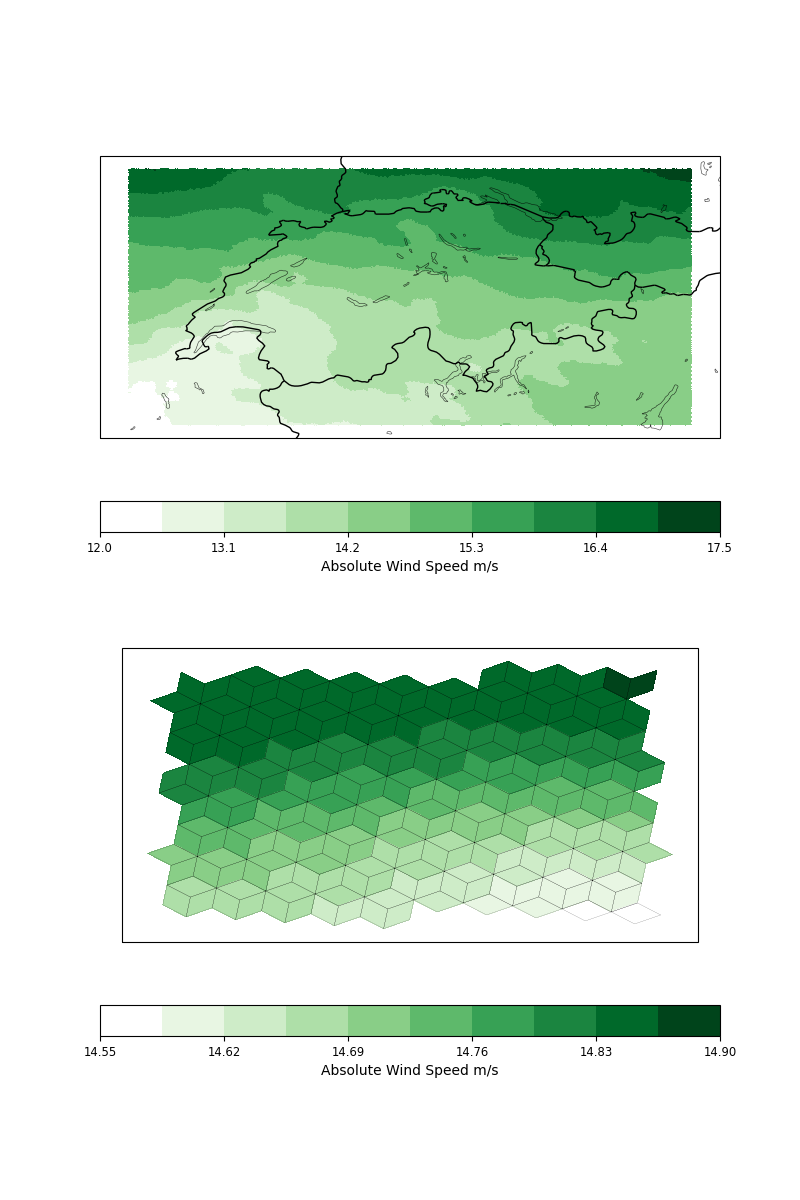

In [36]:
axes = psy.multiple_subplots(2, 1, n=2, for_maps=True)

edge_scalar_plots = ds.psy.plot.mapplot(
     name=['wind_abs','wind_abs'], 
     xgrid=None, ygrid=None, 
     #bounds=list(range(0, 40)),
     cticksize='small',
     cmap='w_Greens', 
     borders=True,
     lonlatbox=[5.5, 11.0, 45.5, 48.0],
     clabel="Absolute Wind Speed m/s",
     ax=axes[:]
)

# Zoom in to small area to see that data is plotted on the edge grid.

edge_scalar_plots[1].psy.update(
    datagrid=dict(c='k', lw=0.1),
    lonlatbox=[7.8, 8.0, 47.0, 47.1]
)


In [13]:
plt.ioff()

with edge_scalar_plots as sp:
    sp.export('edge_scalar_plots.png')

plt.ion()

/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries

## Vector Edge Variables

In [21]:
# Psyplot expects vectors to be provided in zonal and meridional directions, not normal and tengential to the cells. 
# We must therefore convert VN and VT to lon/lat vectors before plotting.
# This calculation is the reason why the combine_grid_information module adds normal_edge to the dateset coordinates.
ds=ds.assign(wind_edge_x=(ds.VT*ds.normal_edge[1] + ds.VN*ds.normal_edge[0]))
ds=ds.assign(wind_edge_y=(-ds.VT*ds.normal_edge[0] + ds.VN*ds.normal_edge[1]))

# Give new derived edge variables the correct encoding:
ds.wind_edge_x.encoding['coordinates'] = 'elon elat'
ds.wind_edge_y.encoding['coordinates'] = 'elon elat'

/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site

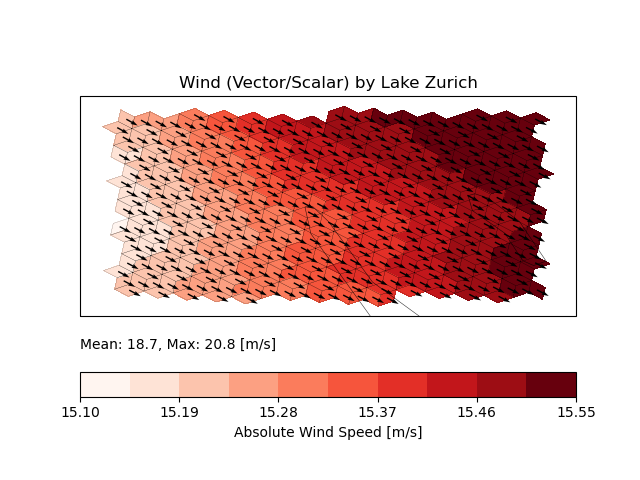

In [30]:
vector_edge_plot = ds.psy.plot.mapcombined(
     name=[['wind_abs', ['wind_edge_x', 'wind_edge_y']]],
     xgrid=None, ygrid=None, 
     datagrid=dict(c='k', lw=0.1),
     cmap='Reds', 
     lonlatbox=[8.4, 8.7, 47.3, 47.43],
     clabel="Absolute Wind Speed [m/s]",
     title="Wind (Vector/Scalar) by Lake Zurich"
     )

In [31]:
plt.ioff()

with vector_edge_plot as sp:
    sp.export('vector_edge_plot.png')

plt.ion()

/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/scratch/vcherkas/envs/psyplot/lib/python3.8/site